Transformasi Twirl

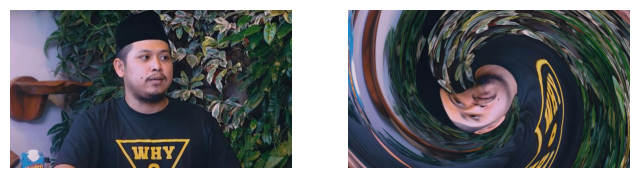

In [13]:
import matplotlib.pyplot as plt 
from skimage import data 
from skimage.transform import swirl 
from skimage import io
 
image = io.imread('tretan.jpeg')
swirled = swirl(image, rotation=0, strength=10, 
radius=4000) 
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
figsize=(8, 3), 
 sharex=True, 
sharey=True) 
ax0.imshow(image, cmap=plt.cm.gray) 
ax0.axis('off') 
ax1.imshow(swirled, cmap=plt.cm.gray) 
ax1.axis('off') 
plt.show()

Translation

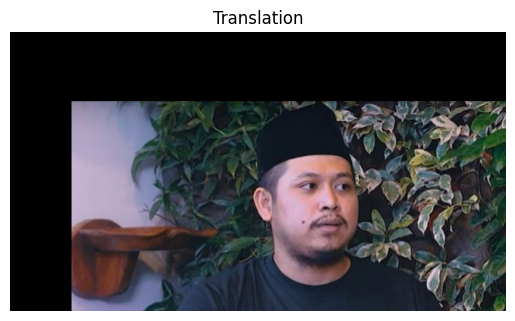

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("tretan.jpeg")
h, w = image.shape[:2]
half_height, half_width = h // 4, w // 8
transition_matrix = np.float32([[1, 0, half_width],
                                [0, 1, half_height]])

img_transition = cv.warpAffine(image,
                               transition_matrix,
                               (w, h))

plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.axis('off')
plt.show()

Rotation

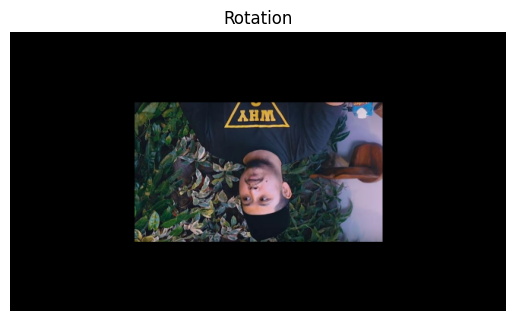

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("tretan.jpeg")
h, w = image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((w/2, h/2), 180, 0.5)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.axis('off')
plt.show()

Interpolation

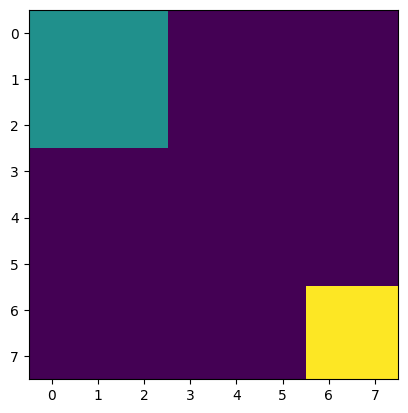

In [16]:
import mahotas as mh
import numpy as np
from pylab import imshow, show
regions = np.zeros((8,8), bool)
regions[:3,:3] = 1
regions[6:,6:] = 1
labeled, nr_objects = mh.label(regions)
imshow(labeled, interpolation='nearest')
show()

In [17]:
labeled,nr_objects = mh.label(regions, 
np.ones((3,3), bool))

In [18]:
sizes = mh.labeled.labeled_size(labeled)
print('Background size', sizes[0])
print('Size of first region:{}'.format(sizes[1])) 

Background size 51
Size of first region:9


In [19]:
array = np.random.random_sample(regions.shape)
sums = mh.labeled_sum(array, labeled)
print('Sum of first region:{}'.format(sums[1])) 

Sum of first region:5.5186103895395044


Skala Interpolasi Miring

Text(0.5, 1.0, 'Skewed Interpolation Scale')

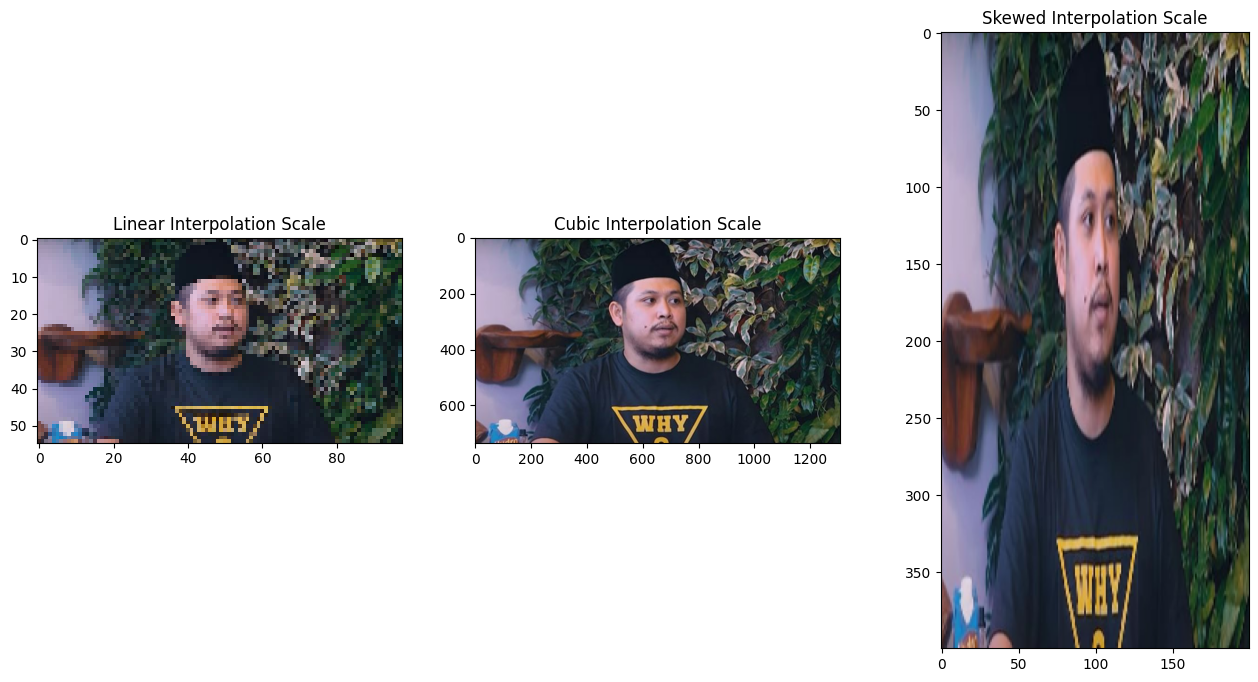

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("tretan.jpeg")

fig, ax = plt.subplots(1, 3, figsize=(16, 8))

image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale") 